# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [74]:
pip install palmerpenguins

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from plotnine import *

In [76]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [77]:
# Specifying variables
X = penguins.drop(['species'], axis = 1)
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [78]:
# Preprocessing
ct = ColumnTransformer(
    [
        ('dummify', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),
         make_column_selector(dtype_include = object)),
        ('standardize', StandardScaler(), make_column_selector(dtype_include = np.number))
    ], remainder = 'passthrough'
)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [79]:
# kNN part 1
knn_pipe1 = Pipeline(
    [
        ('preprocessing', ct),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]
)

In [83]:
# Getting predictions
knn_pipe1.fit(X_train, y_train)
knn_pred1 = knn_pipe1.predict(X_test)

In [91]:
# Part 2
knn_pipe2 = Pipeline(
    [
        ('preprocessing', ct),
        ('knn', KNeighborsClassifier(n_neighbors=100))
    ]
)

In [92]:
# Predictions 2
knn_pipe2.fit(X_train, y_train)
knn_pred2 = knn_pipe2.predict(X_test)

In [93]:
# Confusion Matrix
knn_matrix1 = confusion_matrix(y_test, knn_pred1)
knn_matrix2 = confusion_matrix(y_test, knn_pred2)

matrix1 = pd.DataFrame(knn_matrix1)
matrix2 = pd.DataFrame(knn_matrix2)

print(matrix1)
print(matrix2)

    0   1   2
0  36   1   0
1   0  11   0
2   0   0  36
    0  1   2
0  37  0   0
1   6  5   0
2   0  0  36


In [100]:
# Accuracy scores
knn_acc_1 = accuracy_score(y_test, knn_pred1)
knn_acc_2 = accuracy_score(y_test, knn_pred2)

# Precision testing
knn_prec1 = precision_score(y_test, knn_pred1, average=None)
knn_prec2 = precision_score(y_test, knn_pred2, average=None)

# Recall scores
knn_recall_1 = recall_score(y_test, knn_pred2, average = None)
knn_recall_2 = recall_score(y_test, knn_pred2, average = None)

# Classification Report
class_report1 = classification_report(y_test, knn_pred1)
class_report2 = classification_report(y_test, knn_pred2)

# ROC and Area under the Curve
prob_knn_1 = knn_pipe1.predict_proba(X_test)
roc_auc_knn_1 = roc_auc_score(y_test, prob_knn_1, multi_class='ovr')
prob_knn_2 = knn_pipe1.predict_proba(X_test)
roc_auc_knn_2 = roc_auc_score(y_test, prob_knn_2, multi_class='ovr')

In [109]:
# Decision Tree
dt_pipe1 = Pipeline(
    [
        ('preprocessing', ct),
        ('dt', DecisionTreeClassifier(min_samples_leaf = 2))
    ]
)

In [112]:
dt_pipe2 = Pipeline(
    [
        ('preprocessing', ct),
        ('dt', DecisionTreeClassifier(min_samples_leaf = 50))
    ]
)

In [113]:
# Predictions
dt_pipe1.fit(X_train, y_train)
dt_pred1 = dt_pipe1.predict(X_test)
dt_pipe2.fit(X_train, y_train)
dt_pred2 = dt_pipe2.predict(X_test)

# Confusion Matrix
matrix_dt1 = confusion_matrix(y_test, dt_pred1)
matrix_dt2 = confusion_matrix(y_test, dt_pred2)

print(matrix_dt1, "\n", matrix_dt2)

[[37  0  0]
 [ 0 11  0]
 [ 0  0 36]] 
 [[37  0  0]
 [ 0 11  0]
 [ 0  0 36]]


In [114]:
# Accuracy scores
dt_acc_1 = accuracy_score(y_test, dt_pred1)
dt_acc_2 = accuracy_score(y_test, dt_pred2)

# Precision testing
dt_prec1 = precision_score(y_test, dt_pred1, average=None)
dt_prec2 = precision_score(y_test, dt_pred2, average=None)

# Recall scores
dt_recall_1 = recall_score(y_test, dt_pred2, average = None)
dt_recall_2 = recall_score(y_test, dt_pred2, average = None)

# Classification Report
class_dtreport1 = classification_report(y_test, dt_pred1)
class_dtreport2 = classification_report(y_test, dt_pred2)

# ROC and Area under the Curve
prob_dt_1 = dt_pipe1.predict_proba(X_test)
roc_auc_dt_1 = roc_auc_score(y_test, prob_dt_1, multi_class='ovr')
prob_dt_2 = dt_pipe1.predict_proba(X_test)
roc_auc_dt_2 = roc_auc_score(y_test, prob_dt_2, multi_class='ovr')

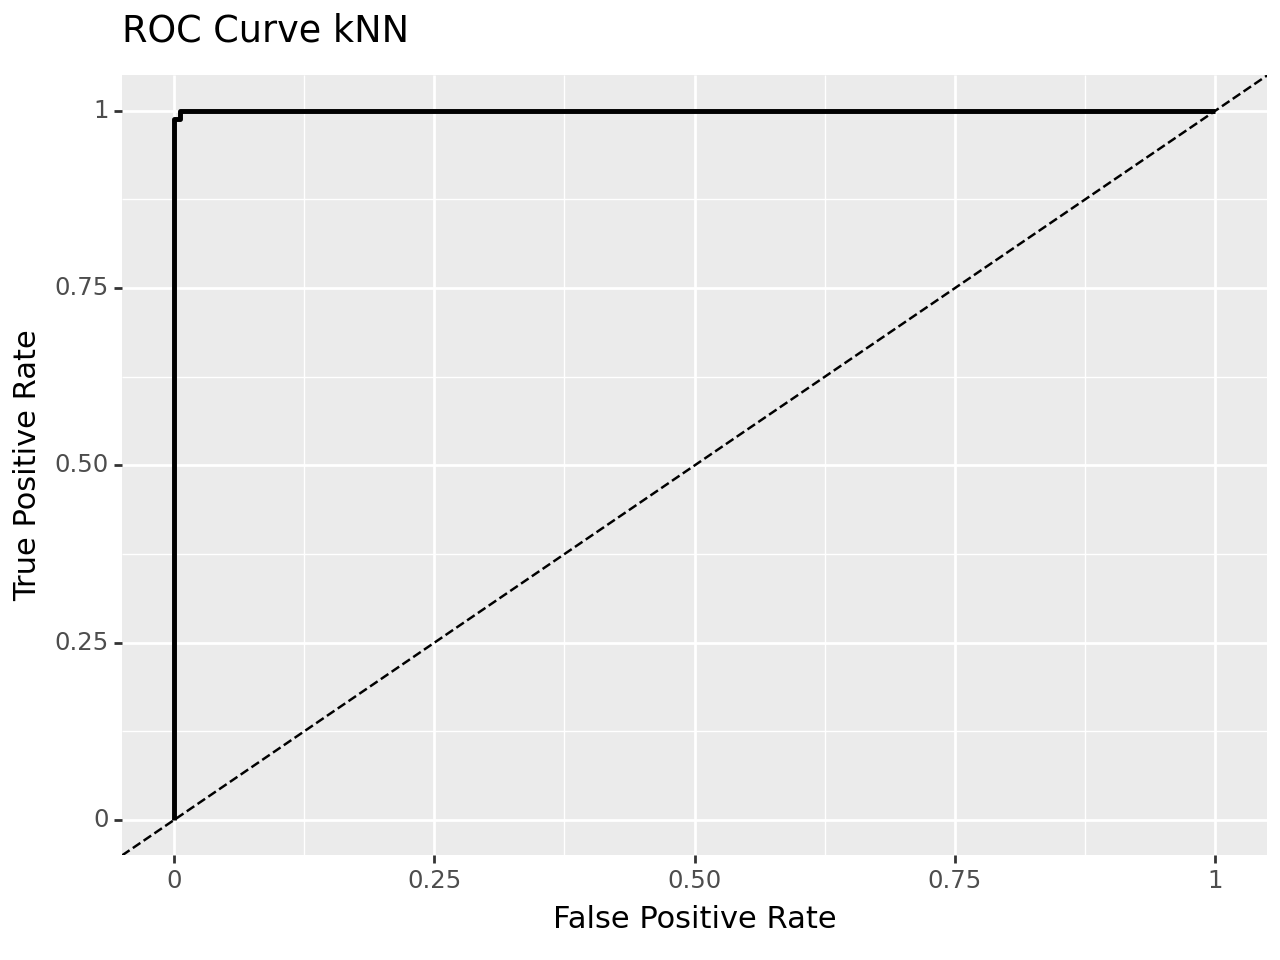

<Figure Size: (640 x 480)>

In [118]:
# Plotting both ROC Curves
y_bin = label_binarize(y_test, classes=knn_pipe1.classes_)

# Get predicted probabilities for each class
y_probs_1 = knn_pipe1.predict_proba(X_test)

# Calculate the ROC curve for each class
fpr, tpr, _ = roc_curve(y_bin.ravel(), y_probs_1.ravel())

# Create a DataFrame for the ROC curve
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Plot the ROC curve using plotnine
(ggplot(roc_df, aes(x='FPR',
                    y='TPR'))
+ geom_line(size=1)
+ geom_abline(slope=1,
              intercept=0,
              linetype='dashed',
              color='black')
+ labs(title='ROC Curve kNN',
       x='False Positive Rate',
       y='True Positive Rate')
)

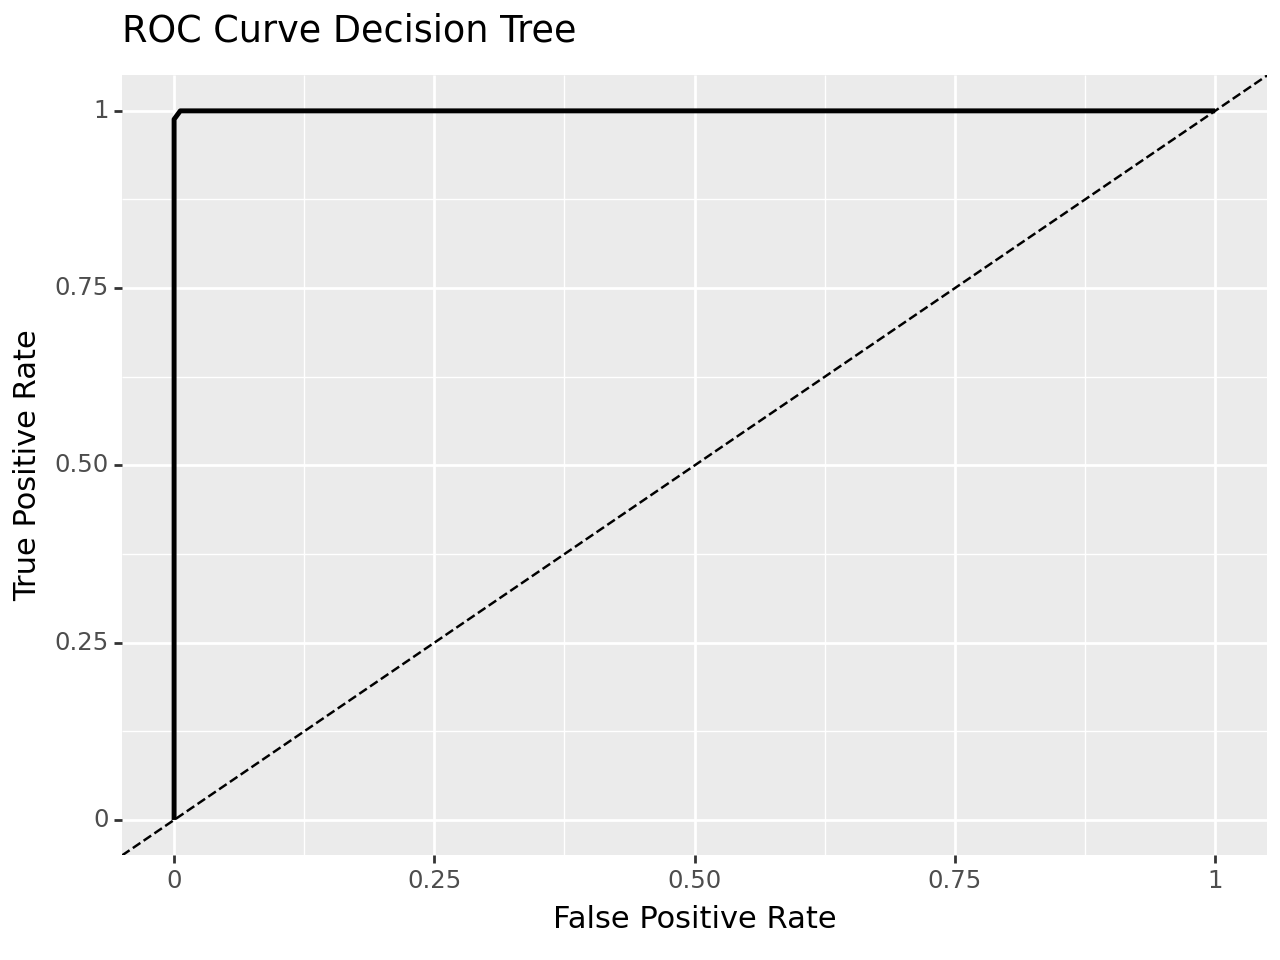

<Figure Size: (640 x 480)>

In [117]:
# Plotting
y_bin = label_binarize(y_test, classes=dt_pipe1.classes_)

# Get predicted probabilities for each class
y_probs_3 = dt_pipe1.predict_proba(X_test)

# Calculate the ROC curve for each class
fpr, tpr, _ = roc_curve(y_bin.ravel(), y_probs_3.ravel())

# Create a DataFrame for the ROC curve
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Plot the ROC curve using plotnine
(ggplot(roc_df, aes(x='FPR',
                    y='TPR'))
+ geom_line(size=1)
+ geom_abline(slope=1,
              intercept=0,
              linetype='dashed',
              color='black')
+ labs(title='ROC Curve Decision Tree',
       x='False Positive Rate',
       y='True Positive Rate')
)